In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv(r"C:\Users\91876\Downloads\spam.csv",encoding="ISO-8859-1")

In [10]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5339,ham,You'd like that wouldn't you? Jerk!,NaN,NaN,NaN
4223,ham,Double eviction this week - Spiral and Michael...,NaN,NaN,NaN
3941,ham,She's borderline but yeah whatever.,NaN,NaN,NaN
2514,ham,Ok ill send you with in &lt;DECIMAL&gt; ok.,NaN,NaN,NaN
5252,ham,You do your studies alone without anyones help...,NaN,NaN,NaN


In [12]:
data.shape

(5572, 5)

In [14]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
# drop last 3 columns
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [17]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
# renaming the columns
data.rename({"v1":"target","v2":"text"},inplace=True)

In [21]:
data.sample(5)

,target,text
3329,ham,Send me yetty's number pls.
183,ham,"He will, you guys close?"
5062,ham,Ok i also wan 2 watch e 9 pm show...
1399,ham,You have registered Sinco as Payee. Log in at ...
3625,ham,Yeah right! I'll bring my tape measure fri!


In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [24]:
data["target"] = encoder.fit_transform(data["target"])

In [25]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
#checking null values
data.isnull().sum()

target    0
text      0
dtype: int64

In [28]:
#checking duplicate values
data.duplicated().sum()

403

In [29]:
data = data.drop_duplicates(keep="first")

In [30]:
data.duplicated().sum()

0

In [31]:
data.shape

(5169, 2)

# 2.Exploratory data analysis

In [32]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
data["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

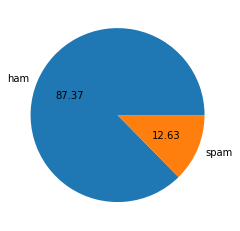

In [37]:
plt.pie(data["target"].value_counts(), labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [38]:
#data is inbalanced

In [39]:
import nltk

In [41]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91876\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [51]:
# character length
data["num_character"] = data["text"].apply(len)

In [52]:
data.head()

,target,text,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [53]:
#tokenize the words
data["num_words"] = data["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [54]:
data.head()

,target,text,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [55]:
#so tokenize the sentence they are in sentence format
data["num_sentence"] = data["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [56]:
data.head()

,target,text,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [58]:
#describe the character,sentence,words
data[["num_character","num_words","num_sentence"]].describe()

,num_character,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286903,1.961308
std,58.236293,13.227173,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [64]:
#describes the ham masseges
data[data["target"]==0][["num_character","num_words","num_sentence"]].describe()

,num_character,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.958370,1.815545
std,56.358207,13.395014,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [65]:
#describe the spam masseges
data[data["target"]==1][["num_character","num_words","num_sentence"]].describe()

,num_character,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


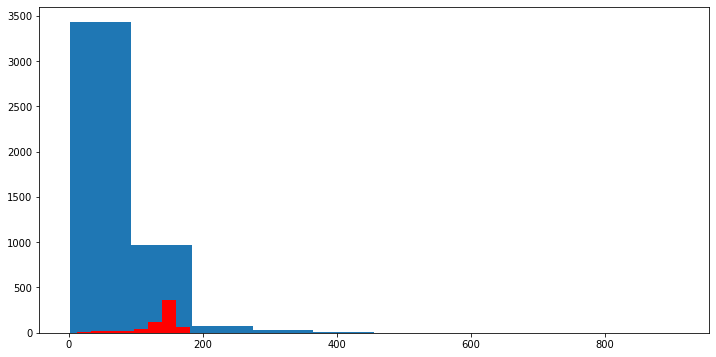

In [74]:
#plot the histogram ham masseges
plt.figure(figsize=(12,6))
plt.hist(data[data["target"]==0]["num_character"])
plt.hist(data[data["target"]==1]["num_character"],color="red")
plt.show()

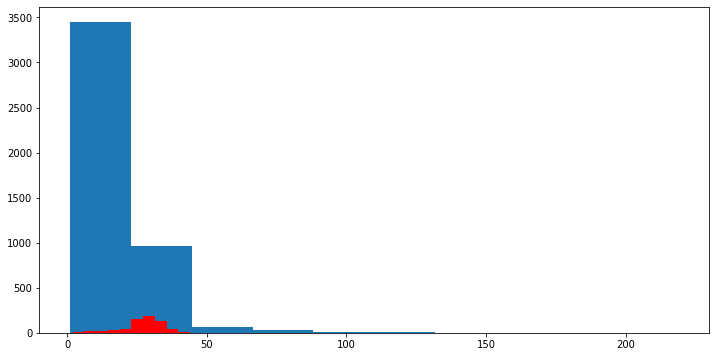

In [75]:
#plot the histogram ham masseges
plt.figure(figsize=(12,6))
plt.hist(data[data["target"]==0]["num_words"])
plt.hist(data[data["target"]==1]["num_words"],color="red")
plt.show()

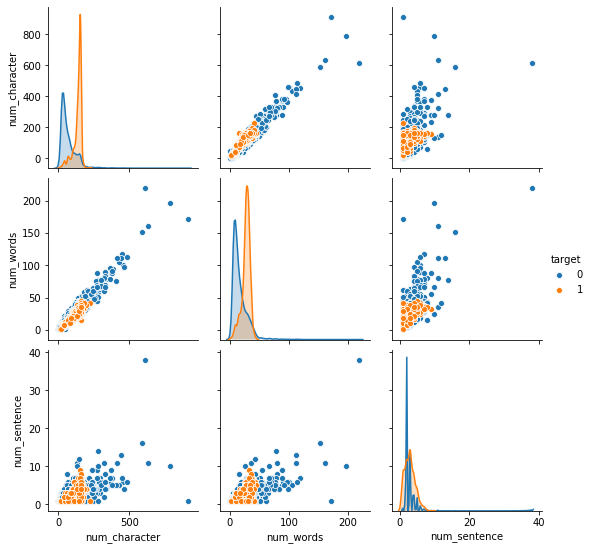

In [76]:
sns.pairplot(data,hue="target")

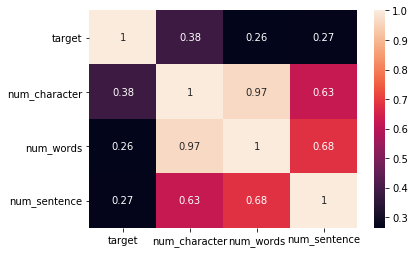

In [78]:
sns.heatmap(data.corr(),annot=True)

# 3. Data Preprocessing
-> Lower case,
-> Tokenization,
-> Removing special character
-> Removing stop words and punctuation
-> Stemming

In [94]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i .isalnum():
            y.append(i)
        
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in test:
        y.appendps.stem(i)
        
    return " ".join(y)

In [97]:
transform_text("How are you")

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\91876/nltk_data'
    - 'C:\\Users\\public\\OneDrive\\nltk_data'
    - 'C:\\Users\\public\\OneDrive\\share\\nltk_data'
    - 'C:\\Users\\public\\OneDrive\\lib\\nltk_data'
    - 'C:\\Users\\91876\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
